In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [8]:
T = 10000
N = 32
def alpha(t, alpha_max=np.inf):
    return N/2*np.exp(-t/T*4)

In [9]:
def phi(cx, cy, t, w=10, h=10):
    yy, xx = np.meshgrid(np.arange(h) - h//2 -cy , np.arange(w) - w//2 -cx)
    out = np.exp(-(xx**2 + yy**2) / (2*alpha(t)**2 +1e-3))
    return out.T

In [10]:
def update_weight(cx, cy, t, weights, y, c=1e-5, wh = (N, N)):
    tile = phi(cy, cx, t, wh[0], wh[1])[:, :, np.newaxis]
    res =  (tile*( y - weights)) * 0.1*np.exp(-t/T)
    return res

In [11]:
def win(weights, y):
    h, w, _ = weights.shape
    loss = np.mean((weights - y)**2, axis=(2,))
    index = np.argmin(loss)
    return (index//h -h//2, index%w -w//2)

In [12]:
def main_loop(weights, t, show_flag=False):
    n_train = x_train.shape[0]
    for i, train in enumerate(x_train[np.random.permutation(n_train)]):
        #train = np.random.uniform(size=(3,)) * 255.
        cx, cy = win(weights, train)
        delta = update_weight(cx, cy, t, weights, train, c=1e-4, wh=(N, N))
        weights = weights + delta
        weights = np.clip(weights, 0, 255.)
        if show_flag:
            W = weights
            plt.imshow((W - W.min())/ (W-W.min()).max())
            print('t{} i{}'.format(t, i))
            plt.show()
    return weights

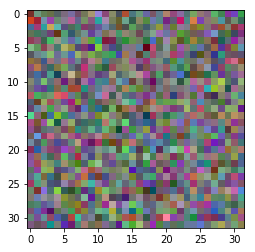

In [13]:
N = 32
n_neuron = 3
som_weights = np.random.normal(size=(N, N, n_neuron))
som_weights -= som_weights.min()
som_weights /= som_weights.max()
som_weights *= 255.

plt.imshow(som_weights/255)
plt.show()

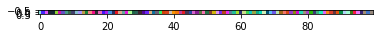

In [19]:
x_train = np.random.uniform(size=(100, 3))
plt.imshow(x_train[np.newaxis, :])

In [20]:
W = som_weights.copy()
show_flag = False
n_epoch = 50
T = n_epoch
for t in range(n_epoch):
    W = main_loop(W, t, show_flag=show_flag)
    if show_flag:
        plt.imshow((W - W.min())/ (W-W.min()).max())
        plt.show()

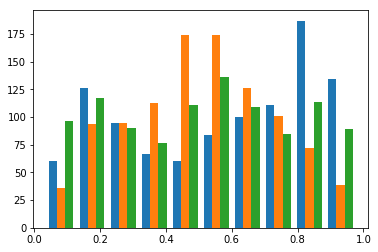

In [21]:
plt.hist(W.reshape(-1, 3))
plt.show()

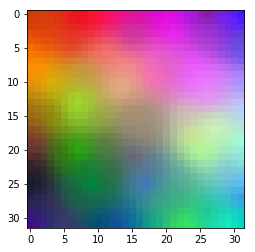

In [22]:
plt.imshow((W - W.min())/ (W-W.min()).max())
plt.show()

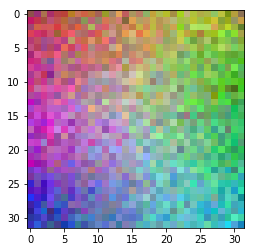

In [59]:
img = W - som_weights
plt.imshow((img - img.min())/(img - img.min()).max())

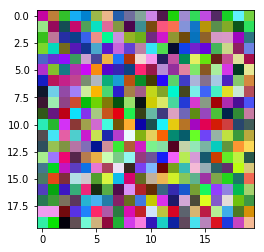

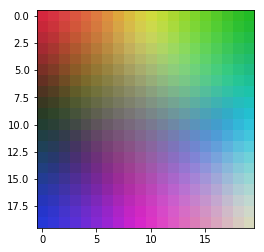

In [432]:
import numpy as np
from matplotlib import pyplot as plt

class SOM():

    def __init__(self, teachers, N, seed=None):
        self.teachers = np.array(teachers)
        self.n_teacher = self.teachers.shape[0]
        self.N = N
        if not seed is None:
            np.random.seed(seed)

        x, y = np.meshgrid(range(self.N), range(self.N))
        self.c = np.hstack((y.flatten()[:, np.newaxis],
                            x.flatten()[:, np.newaxis]))
        self.nodes = np.random.rand(self.N*self.N,
                                    self.teachers.shape[1])

    def train(self):
        for i, teacher in enumerate(self.teachers):
            bmu = self._best_matching_unit(teacher)
            d = np.linalg.norm(self.c - bmu, axis=1)
            L = self._learning_ratio(i)
            S = self._learning_radius(i, d)
            self.nodes += L * S[:, np.newaxis] * (teacher - self.nodes)
        return self.nodes

    def _best_matching_unit(self, teacher):
        #compute all norms (square)
        norms = np.linalg.norm(self.nodes - teacher, axis=1)
        bmu = np.argmin(norms) #argment with minimum element 
        return np.unravel_index(bmu,(self.N, self.N))

    def _neighbourhood(self, t):#neighbourhood radious
        halflife = float(self.n_teacher/4) #for testing
        initial  = float(self.N/2)
        return initial*np.exp(-t/halflife)

    def _learning_ratio(self, t):
        halflife = float(self.n_teacher/4) #for testing
        initial  = 0.1
        return initial*np.exp(-t/halflife)

    def _learning_radius(self, t, d):
        # d is distance from BMU
        s = self._neighbourhood(t)
        return np.exp(-d**2/(2*s**2))


N = 20        
teachers = np.random.rand(10000, 3)
som = SOM(teachers, N=N, seed=10)

# Initial map
plt.imshow(som.nodes.reshape((N, N, 3)),
           interpolation='none')
plt.show()

# Train
som.train()

# Trained MAP
plt.imshow(som.nodes.reshape((N, N, 3)),
           interpolation='none')
plt.show()    

In [23]:
# cx = 0
# cy = 0

# xx, yy = np.meshgrid(np.arange(10) - 5 -cy, np.arange(10) -5 -cx)
# a = xx**2  + yy**2

# a

# a[cx-5, cy-5]

# a = phi(0, 1, 1e5)
# np.argmax(a)

# phi(0,1, 1)

# som_weights - np.array([255, 0, 255])

#  np.argmax(np.tile(phi(0, 1, 1e5)[:, :, np.newaxis], (1, 1, 3)) * som_weights, axis=2)

# np.argmax(phi(0, 1, )[:, :, np.newaxis] * som_weights, axis=2)

# for t in [0, 1, 10, 100, 1e3, 1e4, 1e5, 1e6]:
#     plt.hist(phi(0, 1, t).reshape(-1))
#     plt.show()
#     plt.imshow(np.tile(phi(0, 1, t)[:, :, np.newaxis], (1, 1, 3)) * np.arange(10*10*3).reshape(10, 10, 3)/255)
#     plt.show()

# d.shape

# cx = -5
# cy = 4
# t = 1e2
# yy, xx = np.meshgrid(range(10), range(10))
# c = np.hstack((yy.flatten()[:, np.newaxis],
#                xx.flatten()[:, np.newaxis]))
# d = np.linalg.norm(c - np.array([cx+5, cy+5]), axis=1)
# l = 0.1 * np.exp(-t/T*4)
# s = 5 * np.exp(-t/T*4)
# S = np.exp(- d**2 / (2*s**2)).reshape(10, 10)

# X = phi(cx, cy, t)
# plt.imshow(X)
# plt.show()
# plt.imshow(S)
# plt.show()
# plt.imshow((X - S))
# (X - S)

# b = win(weights, x_train[10])
# print((b[0]+5) * 10 + b[1] +5)
# a = phi(b[0], b[1], 1e5)
# print(np.argmax(a))

# plt.imshow(np.tile(phi(-3, -2, 1)[:, :, np.newaxis], (1, 1, n_neuron)))

# cx, cy = win(som_weights, x_train[1])

# cx, cy

# a = som_weights - x_train[1]

# np.linalg.norm(a, axis=2).shape

# weights = update_weight(cx, cy, 0, som_weights, x_train[1])

# cx, cy, weights.shape

# np.random.permutation(10)

# test = (som_weights - x_train[1])
# test = test**2
# print(test.shape)
# print(np.sum(test, axis=2).shape)
# a = np.mean(test, axis=2)
# print(cx, cy)
# print(np.argmin(a), np.min(a), a[cx+5, cy+5], np.sum(test[cx, cy]))
# print(np.unravel_index(np.argmin(a), (10, 10)))


In [24]:
from sklearn import datasets
mnist = datasets.fetch_mldata('MNIST original')

In [178]:
X = mnist.data

In [26]:
class SOM:
    def __init__(self, T, N, trains):
        self.N = N
        self.T = T
        self.trains = trains

    def alpha(self, t, alpha_max=np.inf):
        return self.N/2*np.exp(-t/self.T*4)

    def phi(self, cx, cy, t, w=10, h=10):
        yy, xx = np.meshgrid(np.arange(h) - h//2 -cy , np.arange(w) - w//2 -cx)
        out = np.exp(-(xx**2 + yy**2) / (2*self.alpha(t)**2 +1e-3))
        return out.T

    def update_weight(self, cx, cy, t, weights, y, c=1e-5, wh=None):
        if wh is None:
            wh = (self.N, self.N)
        tile = self.phi(cy, cx, t, wh[0], wh[1])[:, :, np.newaxis]
        res =  (tile*( y - weights)) * 0.1*np.exp(-t/T)
        return res

    def win(self, weights, y):
        h, w, _ = weights.shape
        loss = np.mean((weights - y)**2, axis=(2,))
        index = np.argmin(loss)
        return (index//h -h//2, index%w -w//2)

    def main_loop(self, weights, t, N=32):
        n_train = self.trains.shape[0]
        for i, train in enumerate(self.trains[np.random.permutation(n_train)]):
            cx, cy = self.win(weights, train)
            delta = self.update_weight(cx, cy, t, weights, train, c=1e-4, wh=(N, N))
            weights = weights + delta
            weights = np.clip(weights, 0, 255.)
        return weights

In [76]:
perm = np.random.permutation(X.shape[0])

In [77]:
perm[:100]

array([25664, 45600, 39405, 36866, 66944, 10682, 27813,  6433, 19434,
       33542, 22949,  7108, 68997, 40558, 42584, 68702,  1733,  8051,
       26626, 39740, 41014,  7253, 38421, 67979, 64727, 51437, 53009,
       20336, 41893,  2636, 64170, 30603, 65053, 43090, 56658, 47046,
       35210, 57352, 55232, 33172, 65999,  7063,   903, 50624,   414,
       61025, 39221, 58663, 18774, 69535, 55045, 66610, 56702, 39974,
       16104, 33742, 16377, 61703, 57573,  3678, 51222, 55513, 15090,
       68736, 23397, 19245, 69482, 61309, 49133, 62249, 16278, 13532,
       13651,  1784, 11355, 25722, 54215, 40776, 21109, 32946, 11576,
       48661, 11041, 66716, 24449, 49699, 44690, 18666, 40099, 27998,
        6690, 65912,  6426, 18695, 21750, 52267, 27120, 57503,  4389,
       37690])

In [79]:
X[perm[:100]].shape

(100, 784)

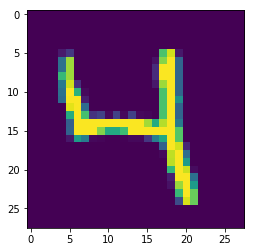

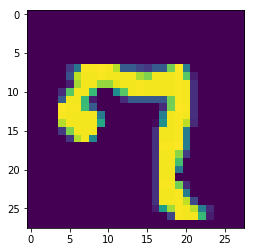

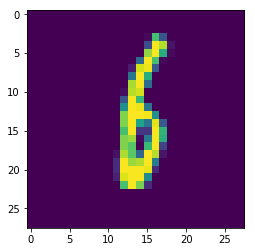

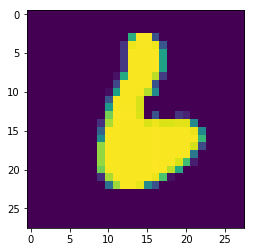

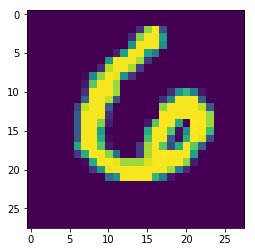

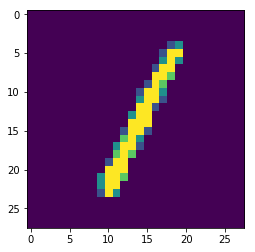

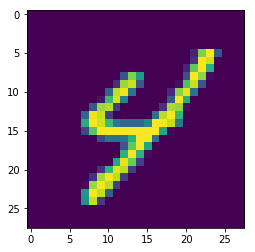

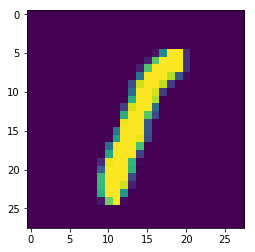

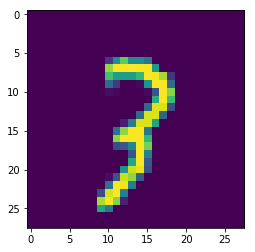

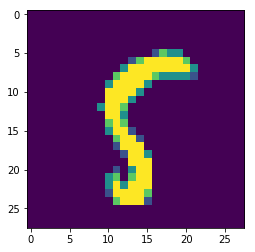

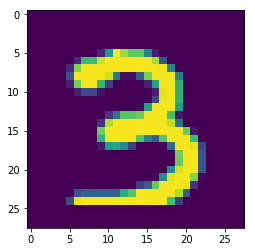

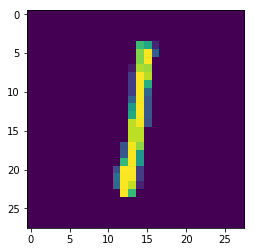

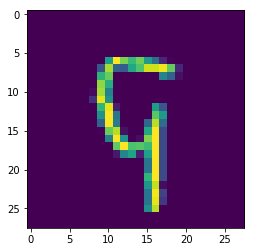

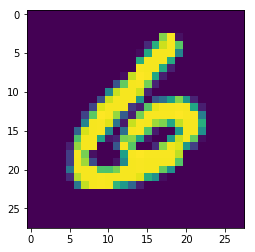

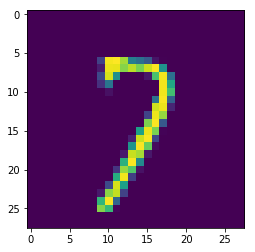

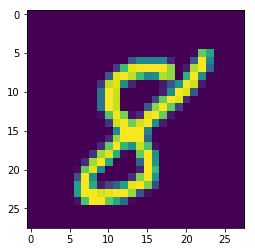

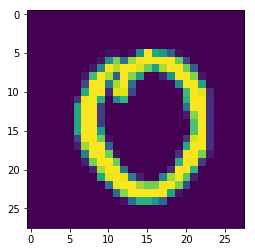

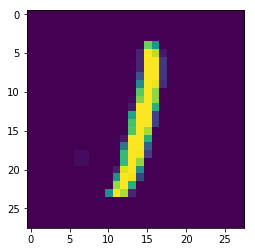

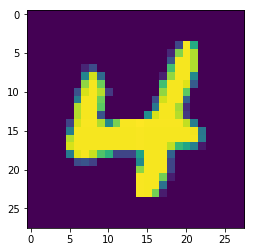

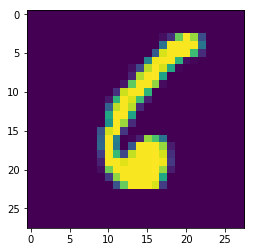

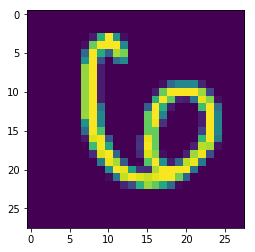

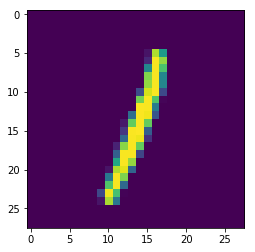

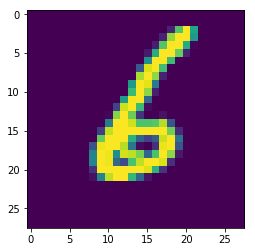

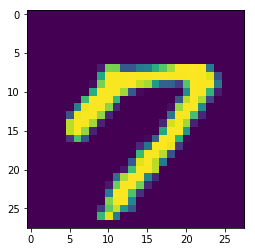

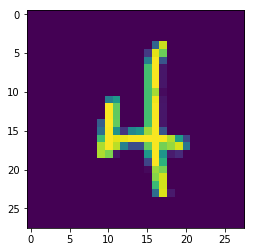

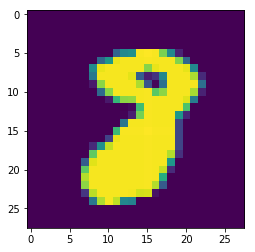

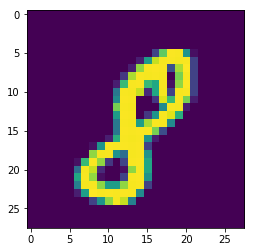

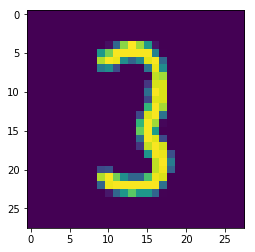

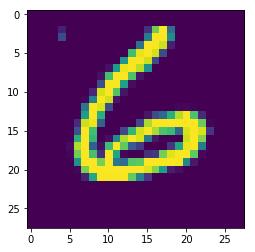

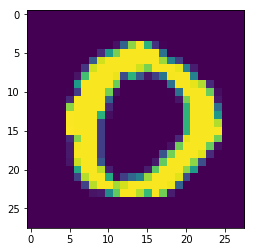

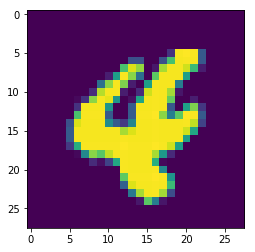

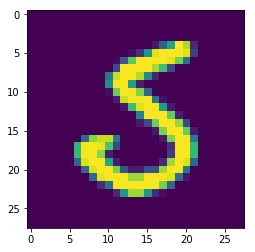

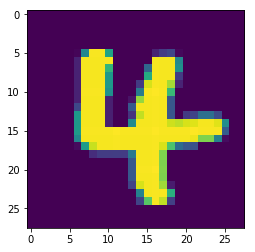

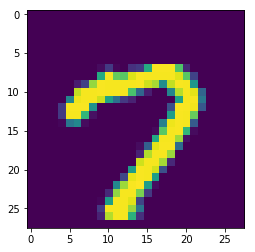

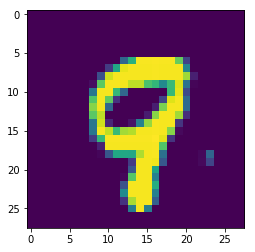

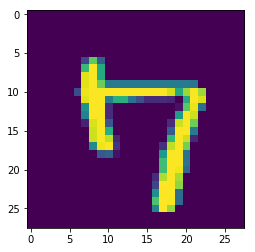

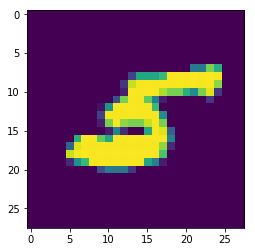

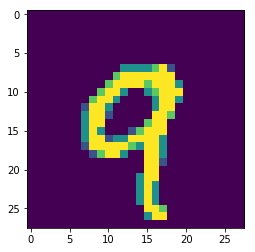

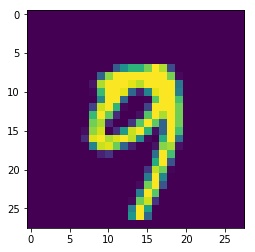

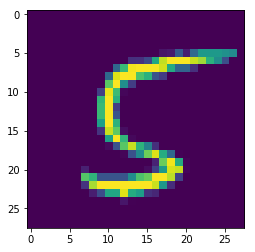

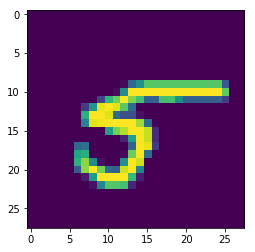

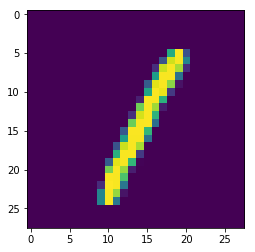

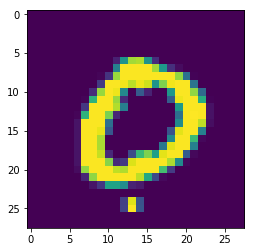

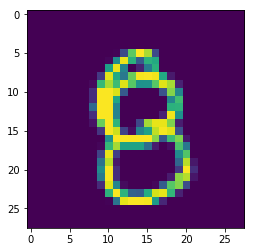

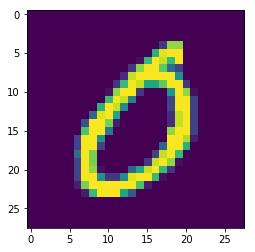

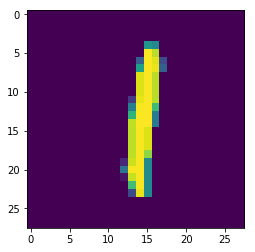

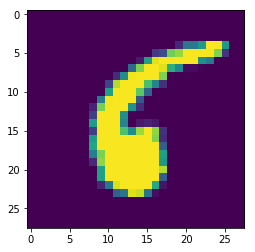

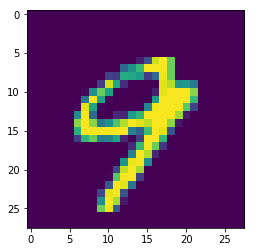

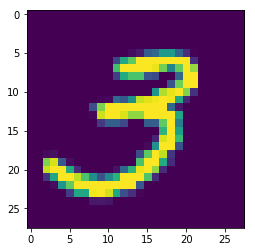

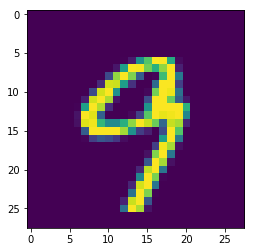

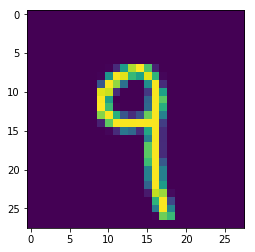

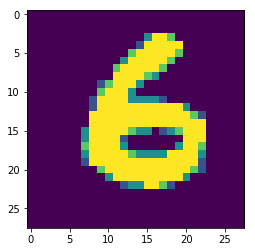

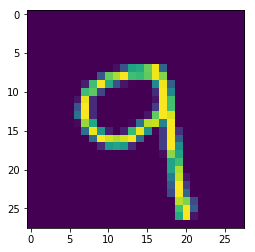

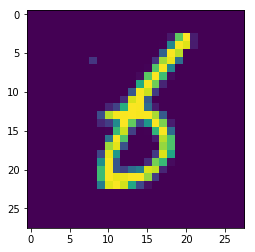

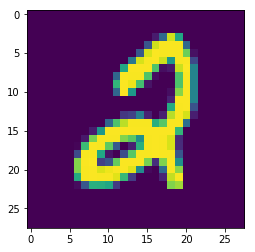

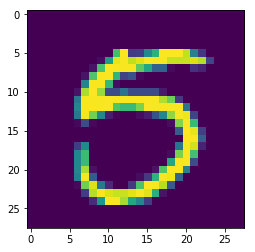

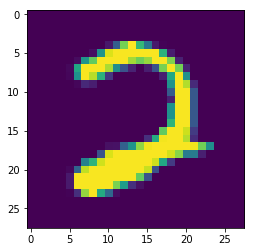

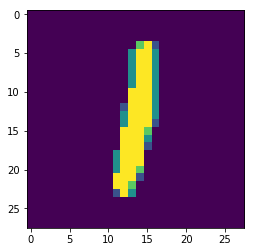

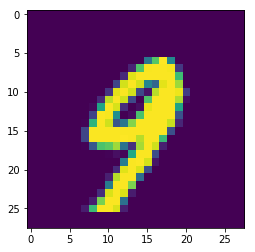

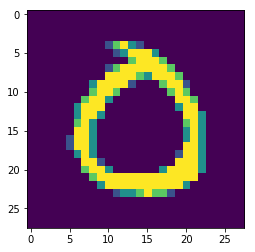

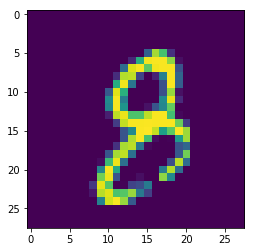

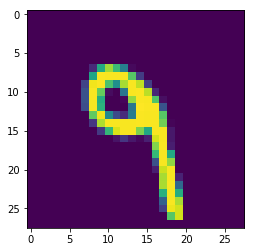

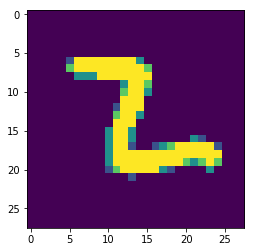

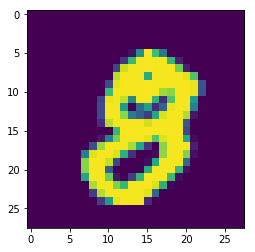

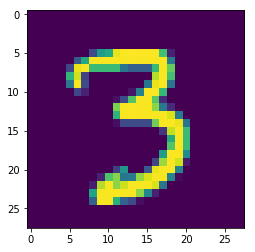

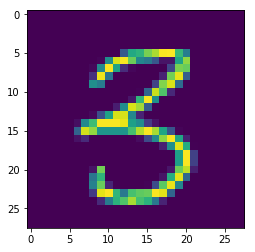

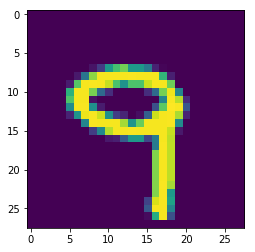

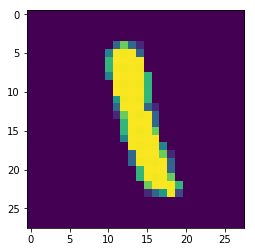

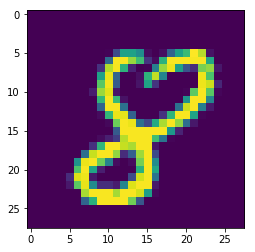

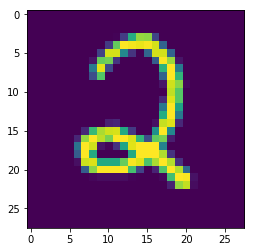

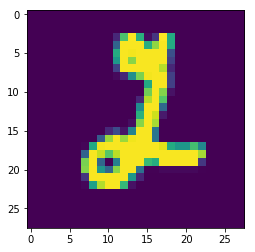

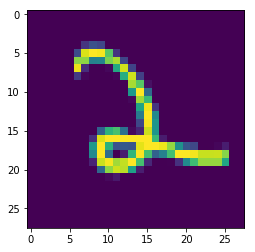

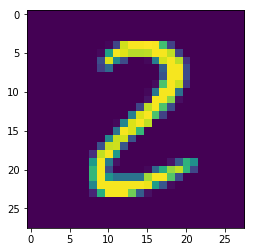

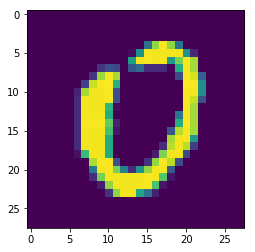

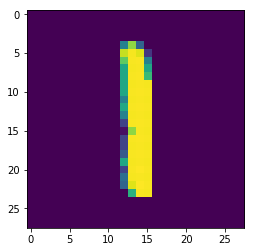

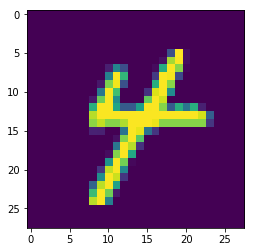

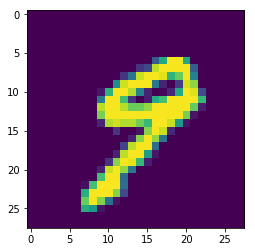

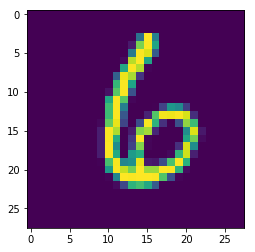

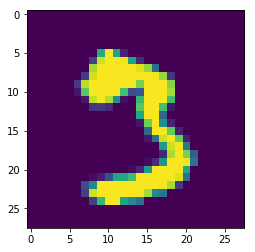

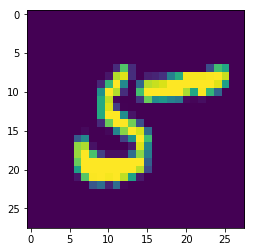

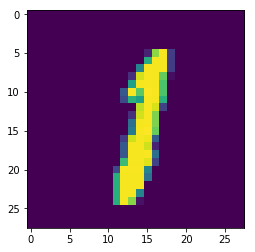

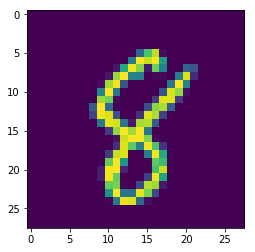

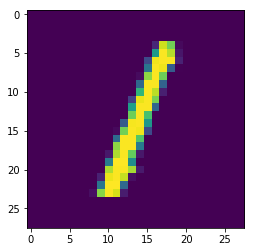

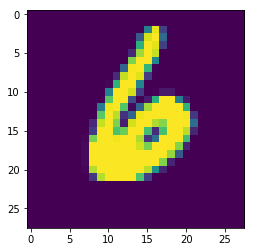

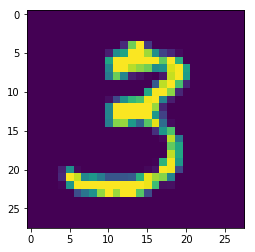

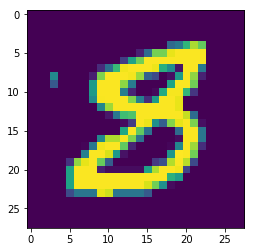

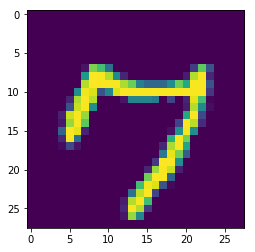

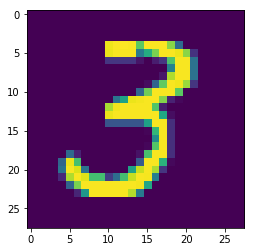

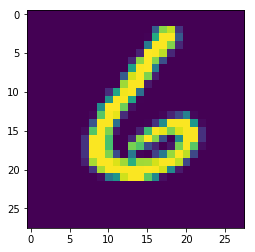

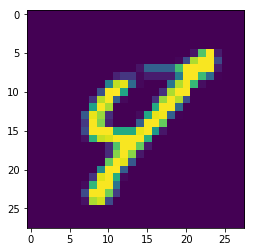

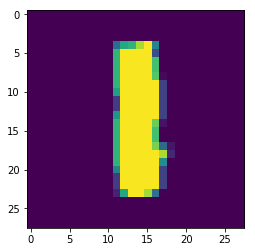

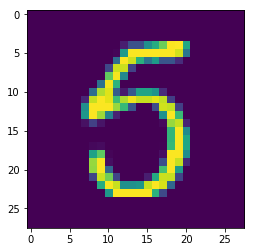

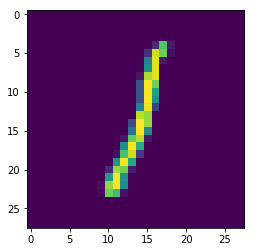

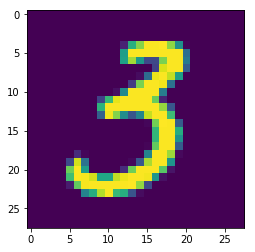

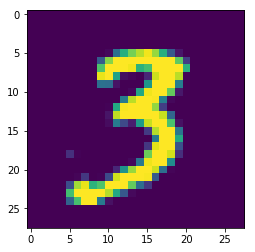

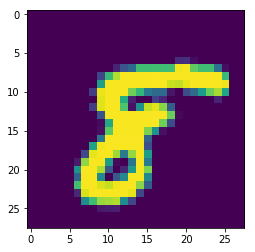

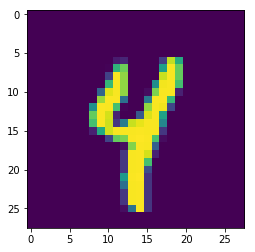

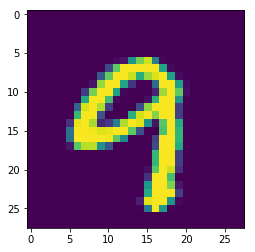

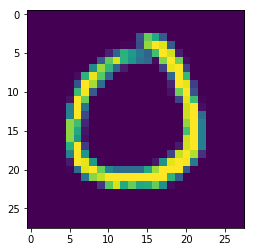

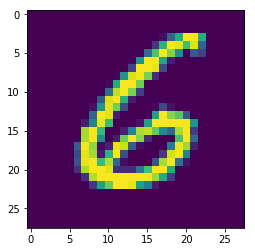

In [87]:
for i in range(100):
    plt.imshow(X[perm[:100]][i].reshape(28, 28))
    plt.show()

In [107]:
T = 50
N = 28

In [108]:
som = SOM(N, T, X[perm[:100]])

In [109]:
n_neuron = 784
som_weights = np.random.normal(size=(N, N, n_neuron))
som_weights -= som_weights.min()
som_weights /= som_weights.max()

In [110]:
W = som_weights.copy()

In [111]:
for t in range(T):
    W = som.main_loop(W, t, N)

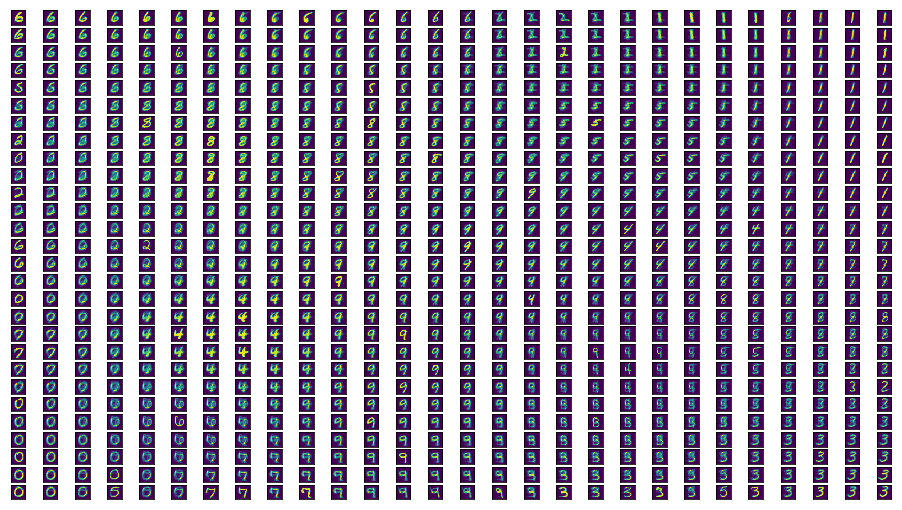

In [114]:
fig, axes = plt.subplots(N, N, figsize=(16, 9))
w, h = (28, 28)

xx, yy = np.meshgrid(range(N), range(N))
grids = np.concatenate((np.expand_dims(yy, axis=2), np.expand_dims(xx, axis=2)),axis=2).reshape(-1, 2)
for i, j in grids:
    axes[i, j].imshow(W[i, j].reshape(w, h))
    axes[i, j].tick_params(labelbottom=False,bottom=False) # x軸の削除
    axes[i, j].tick_params(labelleft=False,left=False) # y軸の削除

# use patch images as train data

In [116]:
from PIL import Image

In [181]:
images = list(map(lambda x: Image.fromarray((x.reshape(28, 28)).astype(np.uint8)), X[perm[:100]]))

In [123]:
np.random.sample

In [126]:
np.random.randint()

In [206]:
n_train = 1000
crop_wh = 5
patches = []
for i in range(n_train):
    sample = np.random.randint(low=0, high=len(images))
    tmp = 7
    w = np.random.randint(low=tmp, high=28-tmp-crop_wh)
    h = np.random.randint(low=tmp, high=28-tmp-crop_wh)
    box = (w, h, w+crop_wh, h+crop_wh)
    res = np.asarray(images[sample].crop(box))
    patches.append(res)

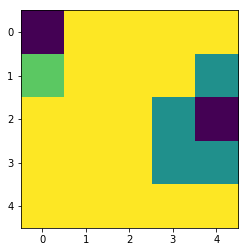

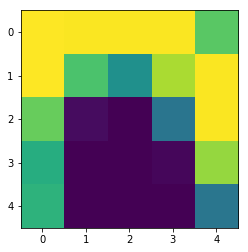

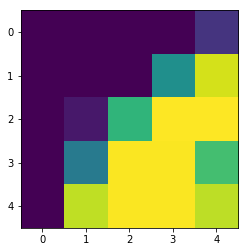

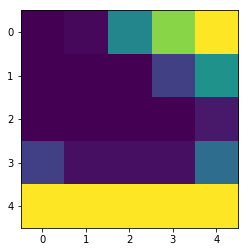

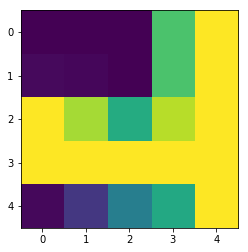

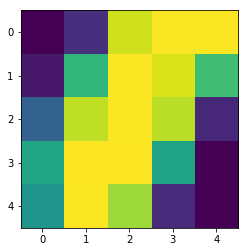

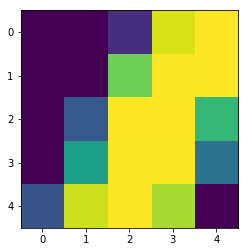

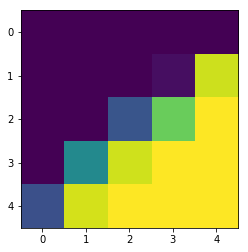

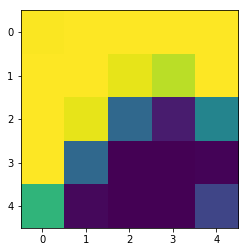

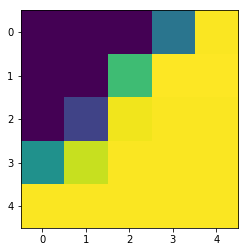

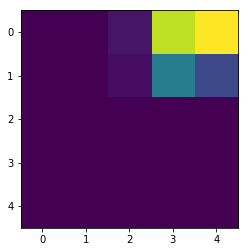

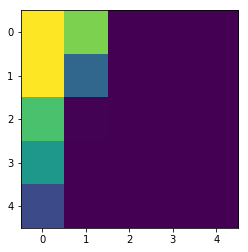

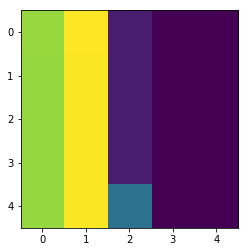

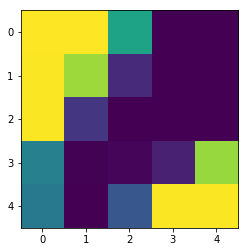

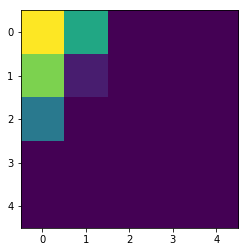

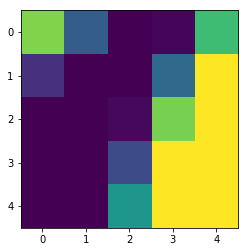

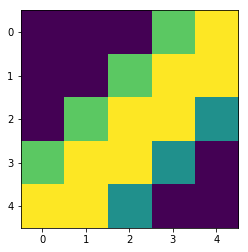

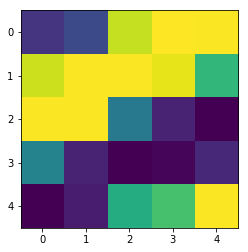

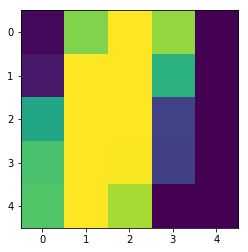

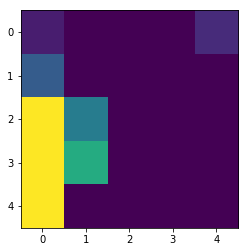

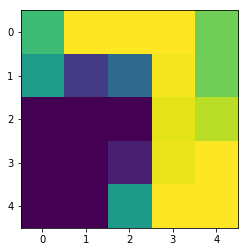

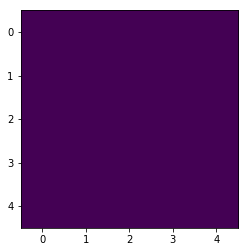

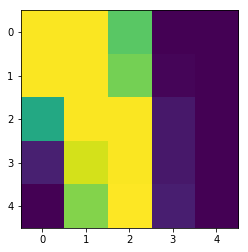

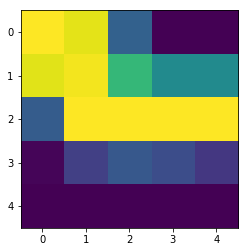

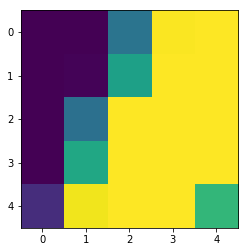

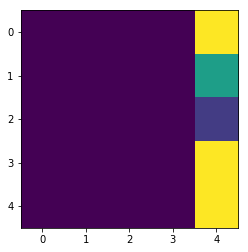

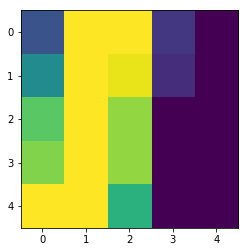

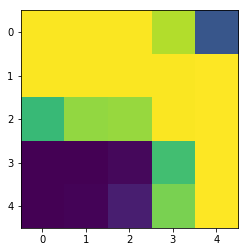

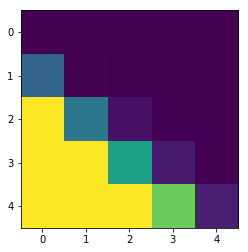

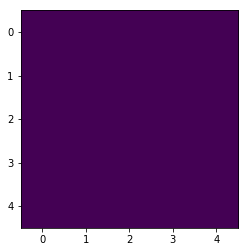

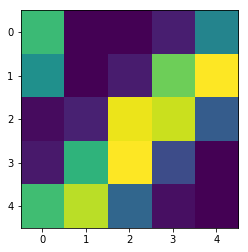

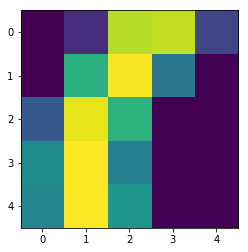

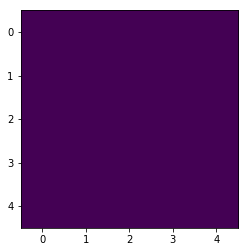

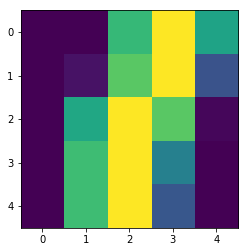

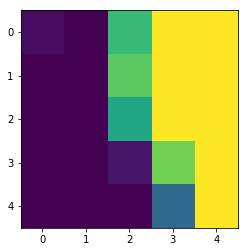

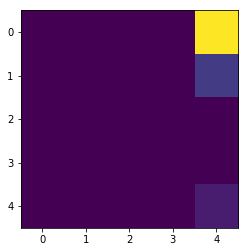

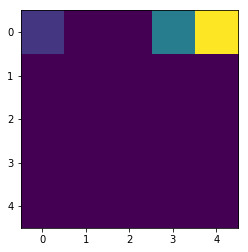

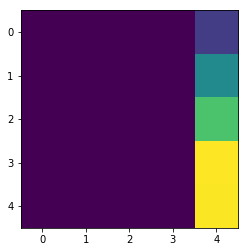

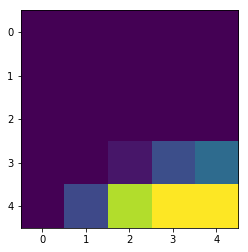

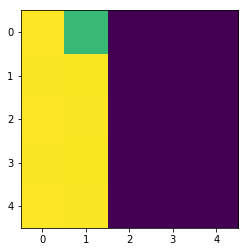

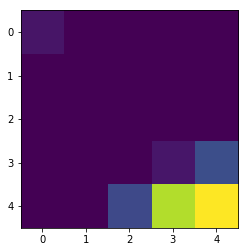

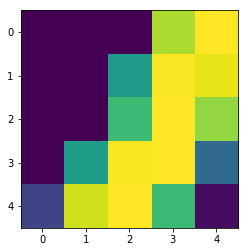

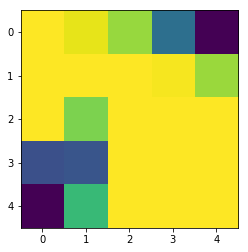

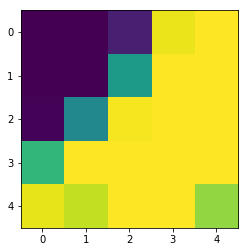

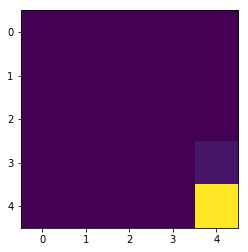

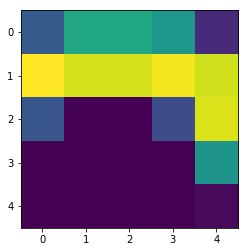

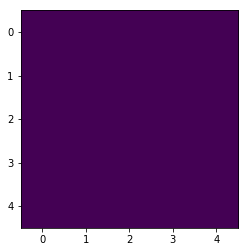

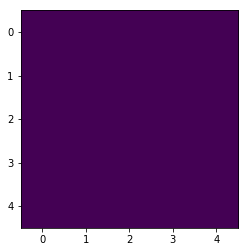

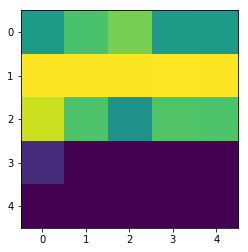

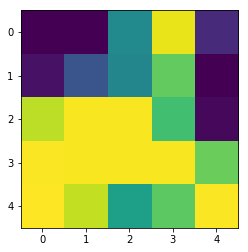

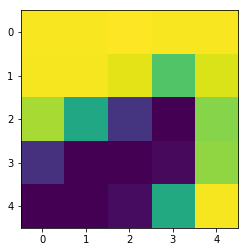

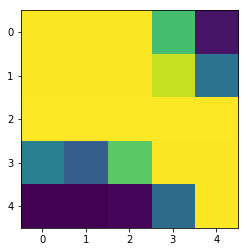

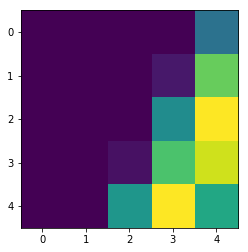

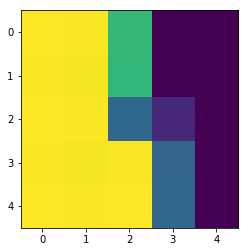

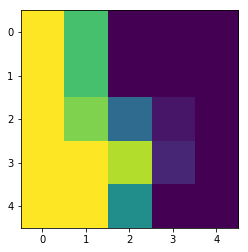

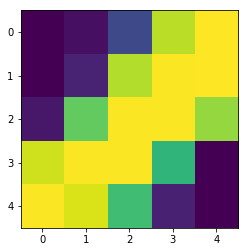

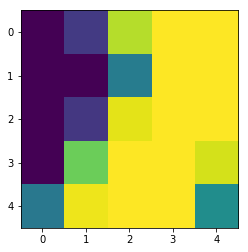

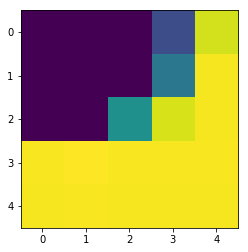

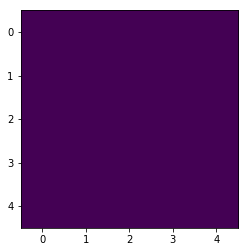

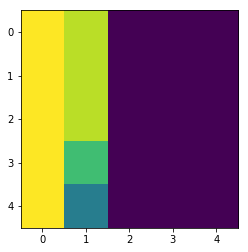

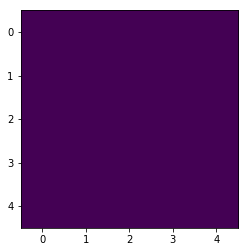

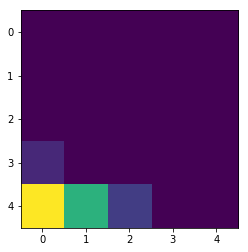

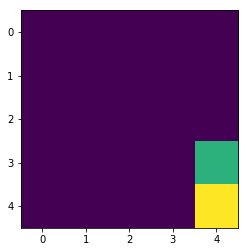

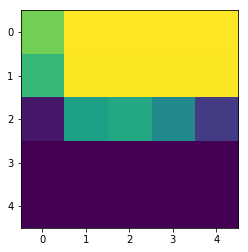

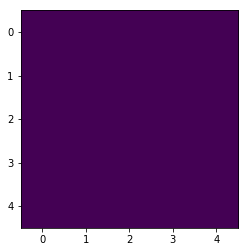

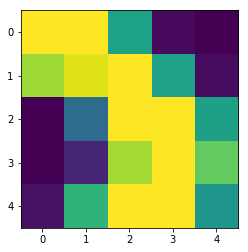

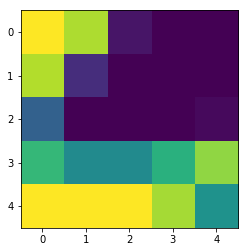

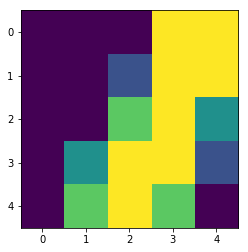

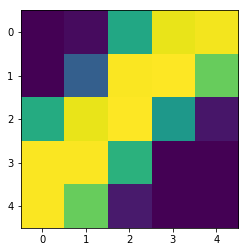

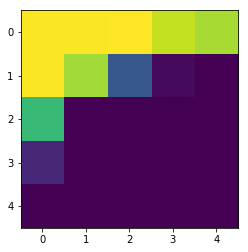

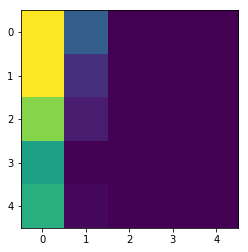

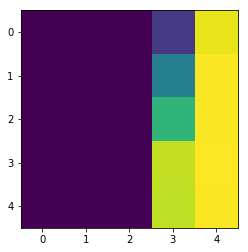

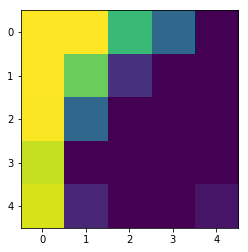

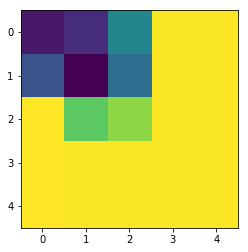

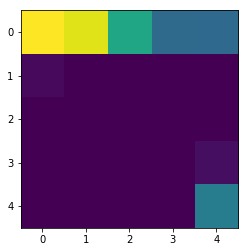

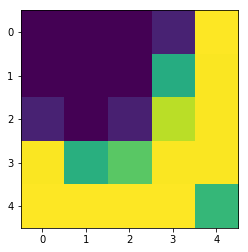

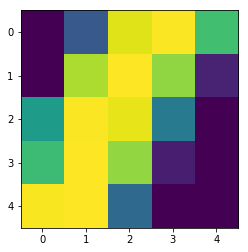

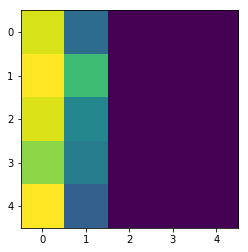

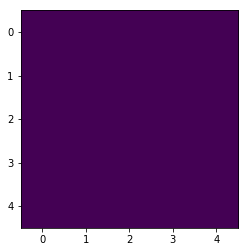

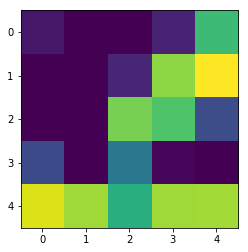

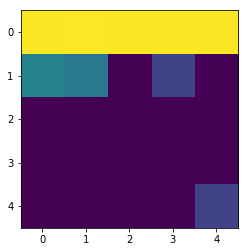

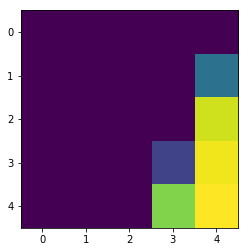

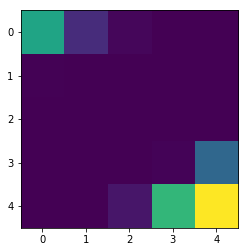

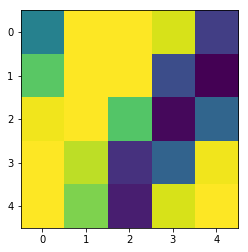

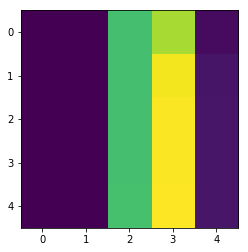

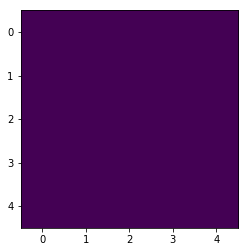

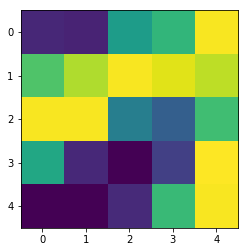

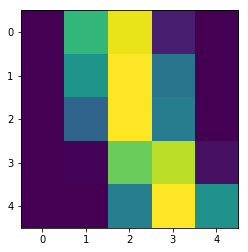

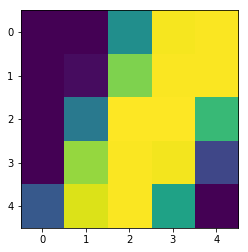

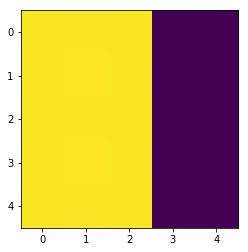

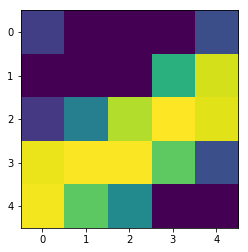

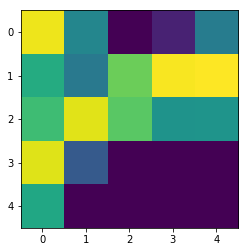

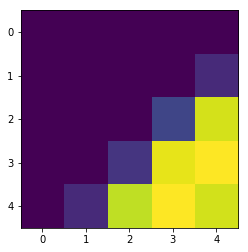

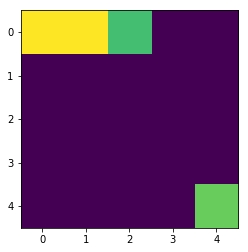

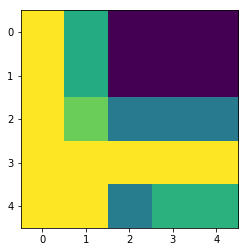

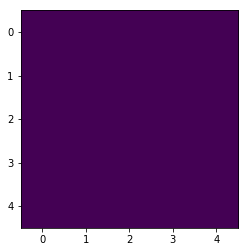

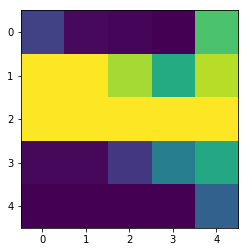

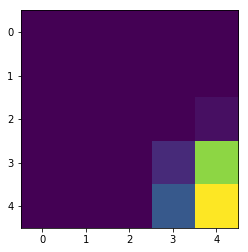

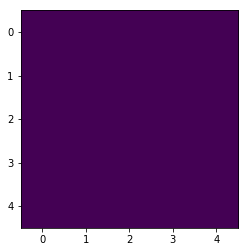

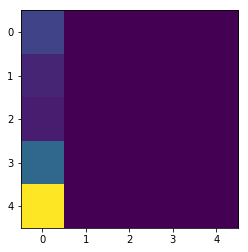

In [207]:
for image in patches[:100]:
    plt.imshow(image)
    plt.show()

In [208]:
patches = np.asarray(patches)/255.
patches = patches.reshape(-1, crop_wh**2)

In [209]:
n_neuron = crop_wh**2
N = 32
som_weights = np.random.normal(size=(N, N, n_neuron))
som_weights -= som_weights.min()
som_weights /= som_weights.max()

In [210]:
W = som_weights.copy()

In [211]:
som = SOM(N, T, patches)

In [212]:
for t in range(T):
    W = som.main_loop(W, t, N)

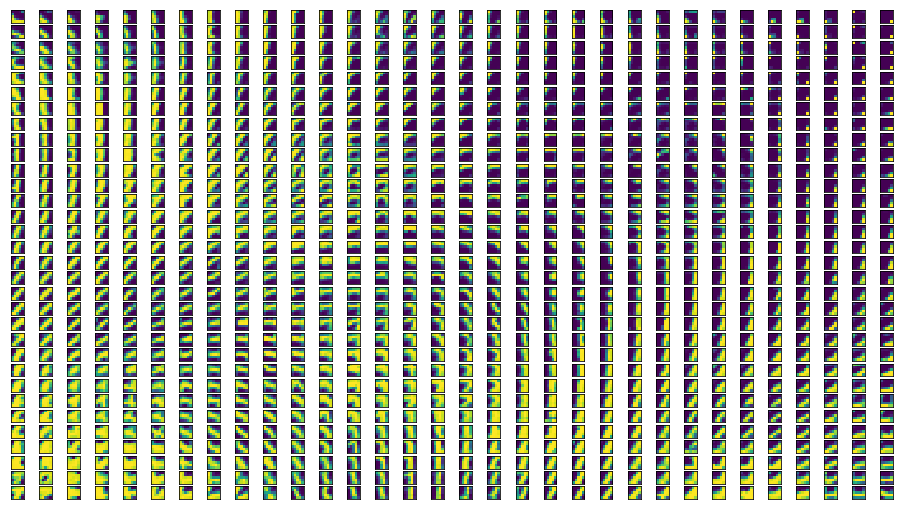

In [213]:
fig, axes = plt.subplots(N, N, figsize=(16, 9))
w, h = (crop_wh, crop_wh)

xx, yy = np.meshgrid(range(N), range(N))
grids = np.concatenate((np.expand_dims(yy, axis=2), np.expand_dims(xx, axis=2)),axis=2).reshape(-1, 2)
for i, j in grids:
    axes[i, j].imshow(W[i, j].reshape(w, h))
    axes[i, j].tick_params(labelbottom=False,bottom=False) # x軸の削除
    axes[i, j].tick_params(labelleft=False,left=False) # y軸の削除